In [2]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

In [3]:
import sklearn.ensemble
import sklearn.metrics
import pandas as pd
#from __future__ import print_function

In [4]:
merged_df = pd.read_csv('s3://sagemaker-us-east-1-123251154742/merged_train.csv')

In [5]:
merged_df_test = pd.read_csv('s3://sagemaker-us-east-1-123251154742/merged_test.csv')

In [6]:
merged_df.head()

,Unnamed: 0,attack_cat,CWE Flag Count,Fwd Act Data Packets,Fwd Packet Length Mean,Packet Length Min,SYN Flag Count,Init Fwd Win Bytes,Flow Packets/s,Fwd Packet Length Max,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,protocol,sevices,states
0,0,Benign,-0.226226,-0.076918,-0.231645,-0.191488,-0.024381,-0.882335,-0.263858,-0.274864,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
1,1,Benign,-0.226226,0.153495,1.008205,-0.380013,-0.024381,0.564832,-0.263283,4.447825,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
2,2,Benign,-0.226226,0.132548,-0.315887,-0.380013,-0.024381,2.034255,-0.264026,-0.251599,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
3,3,Syn,-0.226226,0.006868,-0.386627,-0.351009,-0.024381,0.149387,-0.264026,-0.384539,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
4,4,Benign,-0.226226,0.069708,0.226932,-0.380013,-0.024381,4.275571,-0.264025,7.625088,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258


In [7]:
merged_df_test.head()

,Unnamed: 0,attack_cat,CWE Flag Count,Fwd Act Data Packets,Fwd Packet Length Mean,Packet Length Min,SYN Flag Count,Init Fwd Win Bytes,Flow Packets/s,Fwd Packet Length Max,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,protocol,sevices,states
0,0,Syn,-0.229008,-0.073138,-0.385622,-0.350423,-0.023888,0.165419,-0.264795,-0.380920,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
1,1,Syn,-0.229008,0.511660,-0.385622,-0.350423,-0.023888,0.165419,-0.264796,-0.380920,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
2,2,UDP,-0.229008,-0.170604,1.330292,1.424677,-0.023888,-0.903798,4.404239,0.829275,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
3,3,Syn,-0.229008,-0.170604,-0.327652,-0.350423,-0.023888,-0.805132,4.404239,-0.299150,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
4,4,Benign,-0.229008,-0.219338,-0.341565,-0.379209,-0.023888,-0.687245,4.404239,-0.299150,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365


In [8]:
merged_df.drop('Unnamed: 0', axis=1,inplace=True)
merged_df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
merged_df.head()

,attack_cat,CWE Flag Count,Fwd Act Data Packets,Fwd Packet Length Mean,Packet Length Min,SYN Flag Count,Init Fwd Win Bytes,Flow Packets/s,Fwd Packet Length Max,Avg Bwd Segment Size,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,protocol,sevices,states
0,Benign,-0.226226,-0.076918,-0.231645,-0.191488,-0.024381,-0.882335,-0.263858,-0.274864,0.592668,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
1,Benign,-0.226226,0.153495,1.008205,-0.380013,-0.024381,0.564832,-0.263283,4.447825,4.568006,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
2,Benign,-0.226226,0.132548,-0.315887,-0.380013,-0.024381,2.034255,-0.264026,-0.251599,0.070361,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
3,Syn,-0.226226,0.006868,-0.386627,-0.351009,-0.024381,0.149387,-0.264026,-0.384539,-0.234988,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258
4,Benign,-0.226226,0.069708,0.226932,-0.380013,-0.024381,4.275571,-0.264025,7.625088,2.752256,...,-0.056315,-0.056274,-0.123523,-0.241984,-0.226211,-0.066586,0.461927,-0.015218,0.417527,0.071258


In [10]:
feat_names = list(merged_df)

In [12]:
merged_df_test.head()

,attack_cat,CWE Flag Count,Fwd Act Data Packets,Fwd Packet Length Mean,Packet Length Min,SYN Flag Count,Init Fwd Win Bytes,Flow Packets/s,Fwd Packet Length Max,Avg Bwd Segment Size,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,protocol,sevices,states
0,Syn,-0.229008,-0.073138,-0.385622,-0.350423,-0.023888,0.165419,-0.264795,-0.380920,-0.235850,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
1,Syn,-0.229008,0.511660,-0.385622,-0.350423,-0.023888,0.165419,-0.264796,-0.380920,-0.186561,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
2,UDP,-0.229008,-0.170604,1.330292,1.424677,-0.023888,-0.903798,4.404239,0.829275,-0.235850,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
3,Syn,-0.229008,-0.170604,-0.327652,-0.350423,-0.023888,-0.805132,4.404239,-0.299150,-0.235850,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365
4,Benign,-0.229008,-0.219338,-0.341565,-0.379209,-0.023888,-0.687245,4.404239,-0.299150,-0.235850,...,-0.058188,-0.057617,-0.136185,-0.242492,-0.21926,-0.064249,0.461917,-0.009891,0.418658,0.306365


In [13]:
attacks = set(list(merged_df['attack_cat'].values))

In [14]:
attacks

{'Analysis',
 'Backdoor',
 'Benign',
 'DoS',
 'Exploits',
 'Fuzzers',
 'Generic',
 'LDAP',
 'MSSQL',
 'NetBIOS',
 'Normal',
 'Portmap',
 'Reconnaissance',
 'Shellcode',
 'Syn',
 'UDP',
 'UDPLag',
 'Worms'}

In [15]:
for attack in attacks:
    if attack in ['Normal', 'Benign']:
        merged_df.loc[merged_df["attack_cat"] == attack, "attack_cat"] ='Good'
    else:
        merged_df.loc[merged_df["attack_cat"] == attack, "attack_cat"] ='Bad'

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(merged_df.drop('attack_cat', axis=1), merged_df['attack_cat'], stratify=merged_df['attack_cat'], test_size=0.20)

In [18]:
X_train_summary = shap.kmeans(X_train, 100)

In [19]:
X_test_summary = shap.kmeans(X_test, 100)

In [20]:
def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

In [18]:
#K-nearest neighbors

In [19]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

print_accuracy(knn.predict)

Accuracy = 54.567057775137386%


In [20]:
explainer = shap.KernelExplainer(knn.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [27]:
explainer = shap.KernelExplainer(knn.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.plots.waterfall(shap_values[0])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [23]:
#Support vector machine with a linear kernel

In [ ]:
svc_linear = sklearn.svm.SVC(kernel='linear', probability=True)
svc_linear.fit(X_train, Y_train)
print_accuracy(svc_linear.predict)

In [22]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

NameError: name 'explainer' is not defined

In [ ]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(linear_lr.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [28]:
#Decision Tree Classifier

In [22]:
import sklearn.tree
dtree = sklearn.tree.DecisionTreeClassifier(min_samples_split=2)
dtree.fit(X_train, Y_train)
print_accuracy(dtree.predict)

Accuracy = 52.72538244467548%


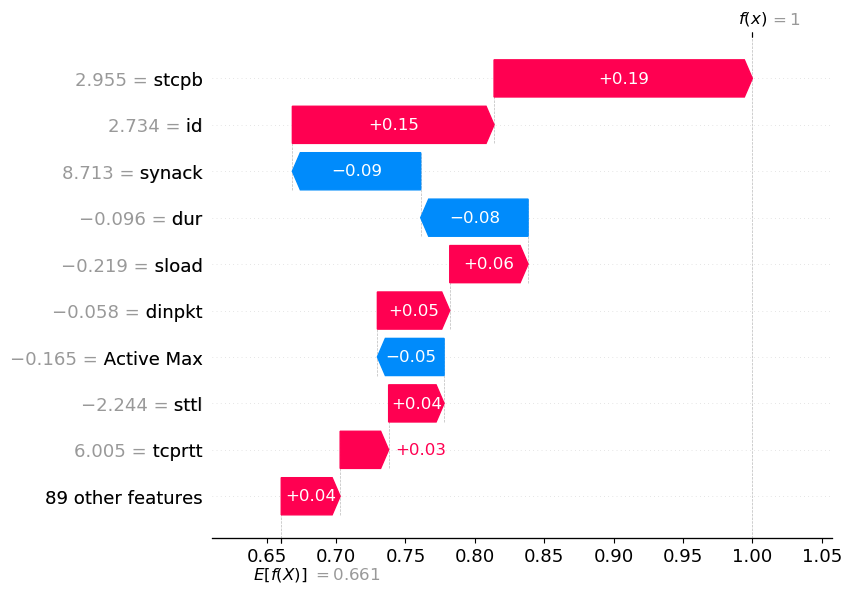

In [33]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(dtree.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test[:20])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[:20])


shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], features= X_test.iloc[0,:])

In [24]:
#Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, Y_train)
print_accuracy(rforest.predict)

Accuracy = 56.248329125204215%


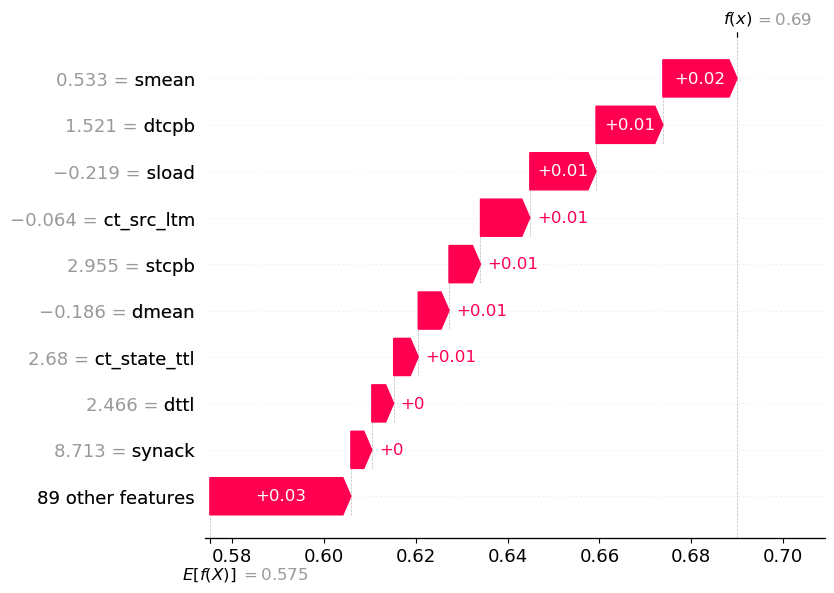

In [32]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(rforest.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test[:20])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0],features= X_test.iloc[0,:])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[:20])

<h2> Neural network:- </h2>

In [27]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1, 2), random_state=0, max_iter=100)
nn.fit(X_train, Y_train)
print_accuracy(nn.predict)

Accuracy = 60.35348284568543%


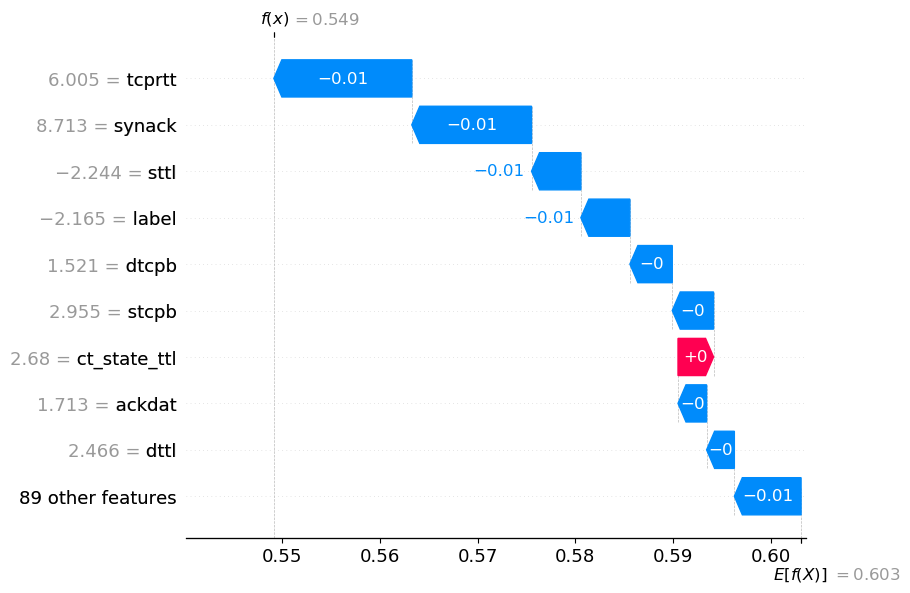

In [31]:
# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test[:20])
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], features= X_test.iloc[0,:])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[:20])